# 1. Loading Dataset

## 1.1. Load a dataset and introduce missingness

Dataset used: Boston Housing Dataset https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

### 1.1.1. Load the dataset and store it as dataframe(numeric)

In [17]:
# For implementation on cluster
import torch
torch.multiprocessing.set_start_method("spawn")

In [18]:
import pandas as pd
import utils

In [19]:
#Test
filename = "data/boston_housing/boston_housing.csv"
df = utils.get_dataframe_from_csv(filename, header_row=0, sep=',') 
df1 = df.copy()
#df = utils.get_dataframe_from_csv(filename, header_row=0, sep=',').iloc[:,:-1]  #remove label

INFO:root:Input filename has to be space separated data


### 1.1.2. Inducing missingness

After dataset loading, start with inducing missingness. 

To start off, introduce simple random missing patterns (Missing Completely At Random), i.e. sample half of the variables and set observations in those variables to missing if an appended random uniform vector has value less than a certain threshhold. WIth threshold of 0.2, the procedure should introduce about 20% missingness.

In [20]:
df2 = utils.induce_missingness(df1,logger_level=20)

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 9.29


In [21]:
df1.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [22]:
df2.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 1.1.3. Create Train-Test split

Create 70% training data and 30%  test data which includes missingness and a test data without missingness so we can calculate performance. 

In [24]:
#Test
train_df, test_df, full_test_df = utils.create_train_test_split(dataframe=df1, test_perc=0.3, logger_level=20)
# print(train_df.head())
print(test_df.head(20))
print(full_test_df.head(20))

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 9.29
INFO:root: Returning train_df, test_df, full_test_df after splitting dataframe in 0.7/0.3 split 
INFO:root: Note: full_test_df is the same as test_df but without NaNs


         crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
237   0.51183   0.0   6.20     0  0.507  7.358   71.6  4.1480    8  307.0   
145   2.37934   0.0  19.58     0  0.871  6.130  100.0  1.4191    5  403.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
98    0.08187   0.0   2.89     0  0.445  7.820   36.9  3.4952    2  276.0   
426  12.24720   0.0  18.10     0  0.584  5.837   59.7  1.9976   24  666.0   
319   0.47547   0.0   9.90     0  0.544  6.113   58.8  4.0019    4  304.0   
306   0.07503  33.0   2.18     0  0.472  7.420   71.9  3.0992    7  222.0   
225   0.52693   0.0   6.20     0  0.504  8.725   83.0  2.8944    8  307.0   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254.0   
238   0.08244  30.0   4.93     0  0.428  6.481   18.5  6.1899    6  300.0   
493       NaN   0.0   9.69     0    NaN  5.707    NaN     NaN    6    NaN   
211   0.37578   0.0  10.59     1  0.489  5.404   88.6  3.6650    4  277.0   

# 2. Modelling

Proceed to modelling.

In R:
Start with initializing 'h2o' package and then reading the training and test datasets as the 'h2o's supported format.
Then run imputation model multiple times as each new start would initialize the weights with different values.<br>
Info at: <br>
[h2o](https://cran.r-project.org/web/packages/h2o/h2o.pdf) package offers an easy to use function for implementing autoencoders. 
More information is available at this [link](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf).

In Python: Using PyTorch to create the DAE, and train using the Adam optimizer from PyTorch

In [26]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.functional as F

In [27]:
#Settings for device, randomization seed, default tensor type, kwargs for memory #DevSeedTensKwargs
RANDOM_SEED = 18
np.random.seed(RANDOM_SEED)

if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    kwargs = {'num_workers':4, 'pin_memory' :True}
else:
    device = 'cpu'
    torch.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.FloatTensor)
    kwards = {}

In [11]:
import dataset_module

In [12]:
trainset = dataset_module.DataSetForImputation(train_df, normalize=True)  #normalize True for [0,1] normalization for dataframe

In [13]:
len(trainset)

354

In [14]:
import Modelling

In [15]:
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()))

In [16]:
net

DenoisingAutoEncoder(
  (drop_layer): Dropout(p=0.5)
  (linear_layer_list): ModuleList(
    (0): Linear(in_features=14, out_features=21, bias=True)
    (1): Linear(in_features=21, out_features=28, bias=True)
    (2): Linear(in_features=28, out_features=35, bias=True)
    (3): Linear(in_features=35, out_features=28, bias=True)
    (4): Linear(in_features=28, out_features=21, bias=True)
    (5): Linear(in_features=21, out_features=14, bias=True)
  )
)

# 3. Training

In [17]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [31]:

import os
from tqdm import tqdm_notebook as tqdm
def train_model(start_steps = 0, end_steps = 5, net=None, model_name = "DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout", train_loader = train_loader, val_loader = val_loader, logger_level = 20):
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)

    NaN_flag = False
    
    for epoch in tqdm(range(start_steps, end_steps)):
        count = epoch-start_steps+1
        net.train()
        #Epoch begins
        epoch_loss = 0.0
        for x, d in tqdm(train_loader):
            # Normalize between [0,1] for better convergence 
            original_x = x
            x[torch.isnan(x)]=0   #If an entire column is zero, division by 0, replace NaNs with zero
            d[torch.isnan(d)]=0 

            optimizer.zero_grad()
            x = x.to(device)
            with torch.no_grad():
                d = d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y, d))   #RMSE Loss   
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            
            #Break if NaN encountered
            if torch.isnan(loss) or torch.isinf(loss):
                logging.info(f"Loss value: {loss.item()}")
                logging.info("NaN/inf occured at:")
                logging.info(f"{x}\n")
                logging.info(f"{d}\n")
                logging.info(f"Original x was : {original_x}")
                NaN_flag = True
                break

            logging.debug(f"Count: {count}, Loss :{loss}")
            
        if NaN_flag: break   #Stop training if NaN encountered
        
        #Print to screen every few epochs    
        if count%LOG_INTERVAL == 0:
            print(f"Epoch number:{epoch} Loss: {epoch_loss:.4f}")  
            
        #Training artifacts
        if model_name not in os.listdir():
            os.makedirs(model_name+"/artifacts/saved_model/")

        #Write to loss file every epoch
        with open(model_name+"/artifacts/loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {epoch_loss:.4f}\n")
            
        #Validation curve
        val_loss = 0.0
        net.eval()
        for x,d in val_loader:
            x[torch.isnan(x)]=0
            d[torch.isnan(d)]=0
            x = x.to(device)
            with torch.no_grad():
                d= d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y,d))
            val_loss+=loss
        net.train()
        #Write Val loss to file every epoch
        with open(model_name+"/artifacts/val_loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {val_loss:.4f}\n")
        
        #Save model every few epochs
        if epoch%SAVE_INTERVAL== 0:
            torch.save(net.state_dict(),f"./{model_name}/artifacts/saved_model/model_at_epoch{epoch}")
        #Epoch Ends

In [19]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout"

In [20]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.4333


Epoch number:19 Loss: 0.3218


Epoch number:29 Loss: 0.2484


Epoch number:39 Loss: 0.2405


Epoch number:49 Loss: 0.2347


Epoch number:59 Loss: 0.2318


Epoch number:69 Loss: 0.2286


Epoch number:79 Loss: 0.2227


Epoch number:89 Loss: 0.2153


Epoch number:99 Loss: 0.2067


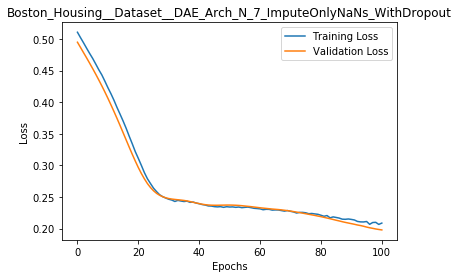

In [22]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")


In [170]:
# '''Remove folder before training again'''
# import shutil
# shutil.rmtree(model_name)

In [ ]:
# Saving model

#torch.save(optimizer.state_dict(), filename)
#optimizer.load_state_dict(torch.load(filename))

# Modelling Loading from saved point

# model =  Modelling.DenoisingAutoEncoder(len(trainset.variables()))
# model.load_state_dict(torch.load("./artifacts/saved_model_epoch50"))
# model.eval()

In [ ]:
#Tweaking the learning rate to improve convergence speed
# optimizer = Adam(net.parameters(), LR)

# 4. Testing

In [23]:
net = net.eval()
print((net(trainset[0][0]).detach()))
print(trainset[0][0])

tensor([ 0.0855, -0.0058,  0.5065,  0.1436,  0.4573,  0.5758,  0.8519,  0.1947,
         0.5629,  0.5770,  0.7306,  0.8413,  0.3294,  0.4198])
tensor([0.0390, 0.0000, 0.6466, 0.0000, 0.3469, 0.6269, 0.6583, 0.2425, 1.0000,
        0.4678, 0.8085, 0.1998, 0.2908, 0.3794])


In [24]:
net = net.eval()
print(trainset.get_denormalized_data((net(trainset[0][0].detach()))))
print(trainset.get_denormalized_data(trainset[0][0]))

       crim        zn      indus      chas       nox        rm        age  \
0  7.614073 -0.578892  14.276637  0.143606  0.609414  6.566298  86.108452   

        dis        rad         tax    ptratio           b      lstat  \
0  3.271031  13.947775  463.381073  19.467182  334.314514  13.793294   

        medv  
0  24.239582  
       crim   zn      indus  chas       nox     rm        age       dis   rad  \
0  3.480435  0.0  18.099998   0.0  0.556201  6.833  67.944099  3.796514  24.0   

        tax    ptratio          b      lstat       medv  
0  411.0625  20.200001  81.329994  12.404513  22.443403  


In [43]:
import pandas as pd
import torch
def test_model(net=None, test_df= None, trainset=None, device =None, logger_level=20):
    """
    Function to evaluate the model on test set
    Should meet the following requirements:
        :-trainset - should be an object of class DataSetForImputation
        :-test_df - should be a Pandas dataframe with NaNs (if there are no NaNs, the same will be returned)
        :-net - should be an object of DenoisingAutoEncoder
    """
    assert isinstance(net, Modelling.DenoisingAutoEncoder)
    assert isinstance(test_df, pd.DataFrame)
    assert isinstance(trainset, dataset_module.DataSetForImputation)
    
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)
    
    NaN_test_df = test_df.reset_index(drop=True)  #Dropping index so that everything is reindexed from 0
       
    test_df = test_df.apply(lambda x: x.fillna(x.mean()), axis=0)
    test_df_norm = (test_df- trainset.min_df)/(trainset.max_df-trainset.min_df)
    test_df_tensor = torch.tensor(test_df_norm.values).to(device)
        
    net = net.eval()
    logging.debug(f"{test_df_tensor.shape}")
    pred = net(test_df_tensor)
     
    pred =  trainset.get_denormalized_data(pred)  #Predicted dataframe from the mode    
    
    # Replace the NaNs in the original test_df with newly imputed values
    final_pred = NaN_test_df.where(~NaN_test_df.isna(), other = pred)
    logging.debug(f"final_pred:\n {final_pred.head()}")
    
    return final_pred

In [26]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.511830,0.0,6.20,0,0.507000,7.358,71.600000,4.148000,8,307.000000,17.4,390.07,4.730000,31.500000
1,2.379340,0.0,19.58,0,0.871000,6.130,100.000000,1.419100,5,403.000000,14.7,172.91,27.800000,13.800000
2,0.027310,0.0,7.07,0,0.469000,6.421,78.900000,4.967100,2,242.000000,17.8,396.90,9.140000,21.600000
3,0.081870,0.0,2.89,0,0.445000,7.820,36.900000,3.495200,2,276.000000,18.0,393.53,3.570000,43.800000
4,12.247200,0.0,18.10,0,0.584000,5.837,59.700000,1.997600,24,666.000000,20.2,24.65,15.690000,10.200000
5,0.475470,0.0,9.90,0,0.544000,6.113,58.800000,4.001900,4,304.000000,18.4,396.23,12.730000,21.000000
6,0.075030,33.0,2.18,0,0.472000,7.420,71.900000,3.099200,7,222.000000,18.4,396.90,6.470000,33.400000
7,0.526930,0.0,6.20,0,0.504000,8.725,83.000000,2.894400,8,307.000000,17.4,382.00,4.630000,50.000000
8,0.056440,40.0,6.41,1,0.447000,6.758,32.900000,4.077600,4,254.000000,17.6,396.90,3.530000,32.400000
9,0.082440,30.0,4.93,0,0.428000,6.481,18.500000,6.189900,6,300.000000,16.6,379.41,6.360000,23.700000


In [27]:
full_test_df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,33.4
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7


In [28]:
test_df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304.0,18.4,396.23,12.73,21.0
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222.0,18.4,396.90,6.47,33.4
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300.0,16.6,379.41,6.36,23.7


# 5. Plotting Loss Curve

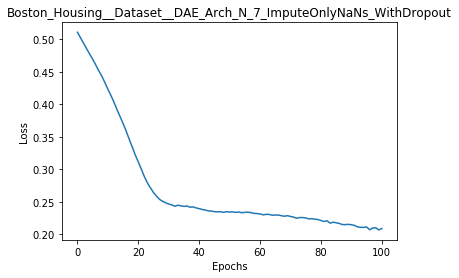

In [29]:
utils.plot_loss_curve(filename= f"{model_name}/artifacts/loss_curve", title=f"{model_name}")

### Model 2 DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout

In [30]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [31]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout"

In [32]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.4422


Epoch number:19 Loss: 0.3352


Epoch number:29 Loss: 0.2605


Epoch number:39 Loss: 0.2321


Epoch number:49 Loss: 0.2281


Epoch number:59 Loss: 0.2198


Epoch number:69 Loss: 0.2115


Epoch number:79 Loss: 0.2020


Epoch number:89 Loss: 0.1891


Epoch number:99 Loss: 0.1755


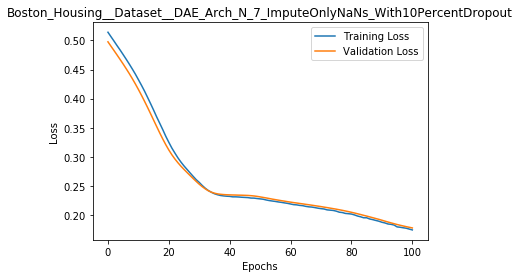

In [33]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [34]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
1,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
4,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2


In [35]:
full_test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2


### Model 3 DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout

In [36]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [37]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout"

In [38]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.4674


Epoch number:19 Loss: 0.3862


Epoch number:29 Loss: 0.2890


Epoch number:39 Loss: 0.2499


Epoch number:49 Loss: 0.2312


Epoch number:59 Loss: 0.2259


Epoch number:69 Loss: 0.2139


Epoch number:79 Loss: 0.1906


Epoch number:89 Loss: 0.1768


Epoch number:99 Loss: 0.1691


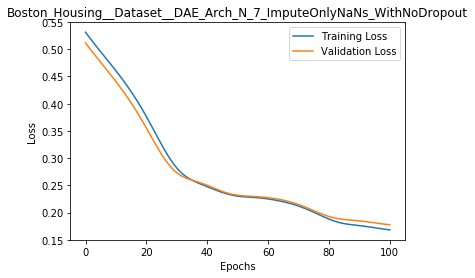

In [39]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [40]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
1,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
4,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2


In [41]:
full_test_df.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2


In [42]:
test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2


### Model 4 DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout

In [43]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [1]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout"

In [45]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.5682


Epoch number:19 Loss: 0.5166


Epoch number:29 Loss: 0.4451


Epoch number:39 Loss: 0.3509


Epoch number:49 Loss: 0.2723


Epoch number:59 Loss: 0.2375


Epoch number:69 Loss: 0.2360


Epoch number:79 Loss: 0.2355


Epoch number:89 Loss: 0.2335


Epoch number:99 Loss: 0.2321


In [3]:
import utils

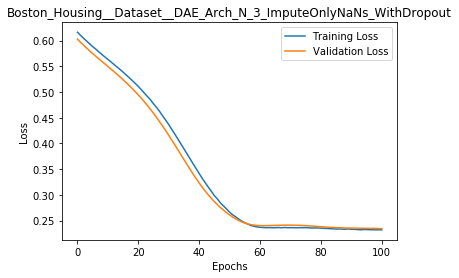

In [5]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [48]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,0,1,2,3,4,5,6,7,8
0,45,-1,76,0,12.086481,-16,7.961649,22.045813,23.953802
1,37,0,95,0,10.000000,7,58.000000,84.000000,26.000000
2,37,0,75,-4,30.000000,0,38.000000,44.000000,6.000000
3,55,0,96,0,50.000000,4,41.000000,47.000000,6.000000
4,41,-1,76,0,10.672318,-14,8.899876,25.765867,27.338888


In [49]:
full_test_df.head() 

,0,1,2,3,4,5,6,7,8
15528,45,-1,76,0,44,-16,31,32,2
14327,37,0,95,0,10,7,58,84,26
12125,37,0,75,-4,30,0,38,44,6
39952,55,0,96,0,50,4,41,47,6
1339,41,-1,76,0,38,-14,35,37,2


In [50]:
test_df.head()

,0,1,2,3,4,5,6,7,8
15528,45,-1,76,0,NaN,-16,NaN,NaN,NaN
14327,37,0,95,0,10.0,7,58.0,84.0,26.0
12125,37,0,75,-4,30.0,0,38.0,44.0,6.0
39952,55,0,96,0,50.0,4,41.0,47.0,6.0
1339,41,-1,76,0,NaN,-14,NaN,NaN,NaN


### Model 5 DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout

In [15]:
import utils, dataset_module, Modelling

In [28]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
#DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
#BATCHES = DATAPOINTS/BATCH_SIZE
#VARIABLES  = len(trainset.variables()) #9


trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 


train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [32]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout"

In [33]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.4825


Epoch number:19 Loss: 0.3892


Epoch number:29 Loss: 0.3091


Epoch number:39 Loss: 0.2616


Epoch number:49 Loss: 0.2362


Epoch number:59 Loss: 0.2329


Epoch number:69 Loss: 0.2314


Epoch number:79 Loss: 0.2282


Epoch number:89 Loss: 0.2236


Epoch number:99 Loss: 0.2162


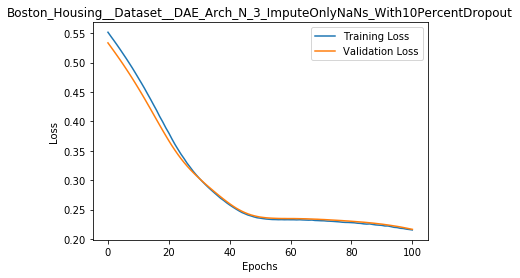

In [34]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [47]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
1,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
4,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2


In [48]:
full_test_df.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2


In [49]:
test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2


### Model 7 DAE_Arch_N_3_ImputeOnlyNaNs_WithNoDropout

In [35]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [36]:
model_name = "Boston_Housing__Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_WithNoDropout"

In [37]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.5017


Epoch number:19 Loss: 0.4349


Epoch number:29 Loss: 0.3404


Epoch number:39 Loss: 0.2649


Epoch number:49 Loss: 0.2406


Epoch number:59 Loss: 0.2312


Epoch number:69 Loss: 0.2295


Epoch number:79 Loss: 0.2244


Epoch number:89 Loss: 0.2165


Epoch number:99 Loss: 0.2039


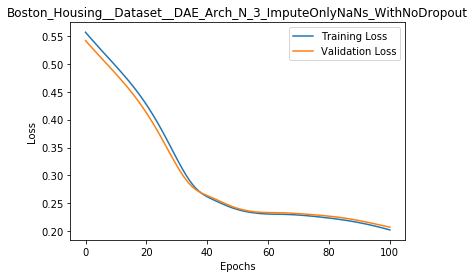

In [38]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [44]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.511830,0.0,6.20,0,0.507000,7.358,71.600000,4.148000,8,307.000000,17.4,390.07,4.730000,31.500000
1,2.379340,0.0,19.58,0,0.871000,6.130,100.000000,1.419100,5,403.000000,14.7,172.91,27.800000,13.800000
2,0.027310,0.0,7.07,0,0.469000,6.421,78.900000,4.967100,2,242.000000,17.8,396.90,9.140000,21.600000
3,0.081870,0.0,2.89,0,0.445000,7.820,36.900000,3.495200,2,276.000000,18.0,393.53,3.570000,43.800000
4,12.247200,0.0,18.10,0,0.584000,5.837,59.700000,1.997600,24,666.000000,20.2,24.65,15.690000,10.200000
5,0.475470,0.0,9.90,0,0.544000,6.113,58.800000,4.001900,4,304.000000,18.4,396.23,12.730000,21.000000
6,0.075030,33.0,2.18,0,0.472000,7.420,71.900000,3.099200,7,222.000000,18.4,396.90,6.470000,33.400000
7,0.526930,0.0,6.20,0,0.504000,8.725,83.000000,2.894400,8,307.000000,17.4,382.00,4.630000,50.000000
8,0.056440,40.0,6.41,1,0.447000,6.758,32.900000,4.077600,4,254.000000,17.6,396.90,3.530000,32.400000
9,0.082440,30.0,4.93,0,0.428000,6.481,18.500000,6.189900,6,300.000000,16.6,379.41,6.360000,23.700000


In [40]:
full_test_df.head(20) 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,33.4
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7


In [41]:
test_df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307.0,17.4,390.07,4.73,31.5
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
426,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,10.2
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304.0,18.4,396.23,12.73,21.0
306,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222.0,18.4,396.90,6.47,33.4
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300.0,16.6,379.41,6.36,23.7
